In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
import scipy.stats as ss
from scipy.stats import dirichlet
#import seaborn
#import plotly

In [2]:
# data set 1 two uniformly distributed classes
overlap = 0.1
width_1 = 2
width_2 = 2
height_1 = 2
height_2 = 2
mu_1_x = -1
mu_1_y = 1
mu_2_x = 1.2
mu_2_y = 1

n_1 = 1000
n_2 = 1000

In [3]:
class_1 = np.random.uniform([mu_1_x-width_1/2, mu_1_y-height_1/2], [mu_1_x+width_1/2, mu_1_y+height_1/2], (n_1, 2))
class_2 = np.random.uniform([mu_2_x-width_2/2, mu_2_y-height_2/2], [mu_2_x+width_2/2, mu_2_y+height_2/2], (n_2, 2))

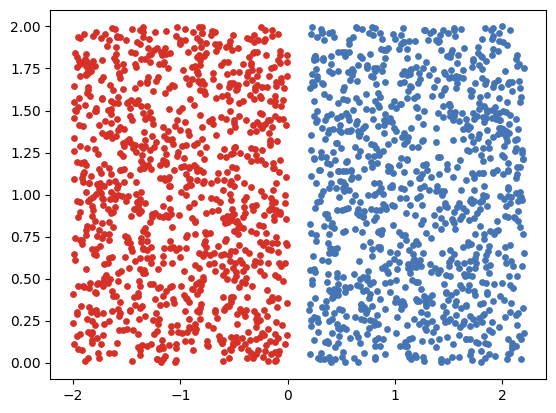

In [4]:
#color_list = np.array([[253,174,97], [69,117,180]]) / 255
color_list = np.array([[165,0,38],
                       [215,48,39],
                       [244,109,67],
                       [253,174,97],
                       [254,224,144],
                       [255,255,191],
                       [224,243,248],
                       [171,217,233],
                       [116,173,209],
                       [69,117,180],
                       [49,54,149]])/255

fig_1, ax_1 = plt.subplots()
ax_1.scatter(class_1[:, 0], class_1[:, 1], color=color_list[1],  s=15)
ax_1.scatter(class_2[:, 0], class_2[:, 1], color=color_list[9],  s=15)
plt.show()

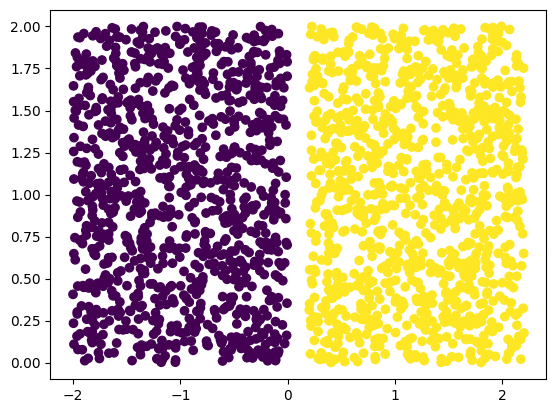

In [5]:
labels_1 = np.zeros((n_1, 1))
labels_2 = np.ones((n_2, 1))

class_1_1 = np.hstack([class_1, labels_1])
class_2_1 = np.hstack([class_2, labels_2])

data_set_uf_hm_l = np.vstack([class_1_1, class_2_1])
np.random.shuffle(data_set_uf_hm_l)
fig_1_1, ax_1_1 = plt.subplots()
ax_1_1.scatter(data_set_uf_hm_l[:, 0], data_set_uf_hm_l[:, 1], c=data_set_uf_hm_l[:, 2].astype('float'))

plt.show()


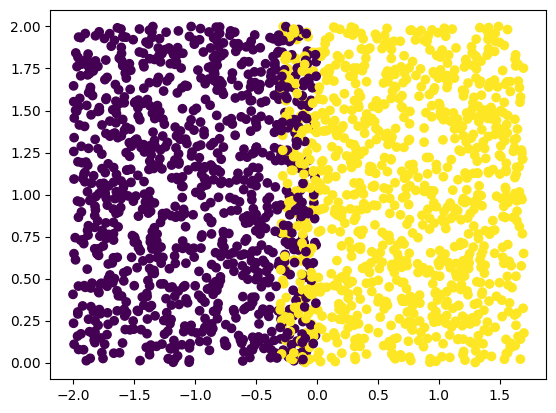

In [6]:
class_2_2 = class_2_1
class_2_2[:, 0] = class_2_2[:, 0] - 0.5
data_set_uf_sm_l = np.vstack([class_1_1, class_2_2])
np.random.shuffle(data_set_uf_sm_l)

fig_1_1, ax_1_1 = plt.subplots()
ax_1_1.scatter(data_set_uf_sm_l[:, 0], data_set_uf_sm_l[:, 1], c=data_set_uf_sm_l[:, 2].astype('float'))
plt.show()


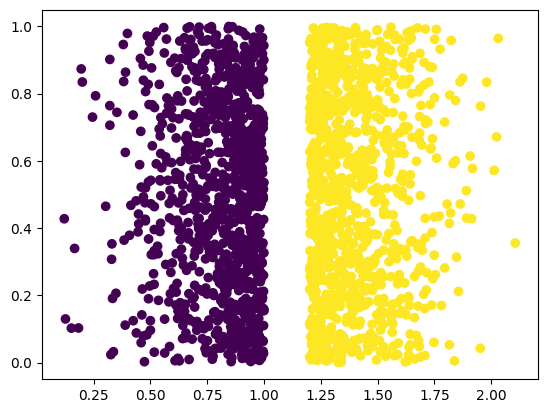

In [7]:
class_3 = np.random.beta([4, 1], [1, 1], size=(n_1, 2))
class_4 = np.random.beta([4, 1], [1, 1], size=(n_1, 2))
class_4[:, 0] = class_4[:, 0] * -1 +2.2

class_3_1 = np.hstack([class_3, labels_1])
class_4_1 = np.hstack([class_4, labels_2])

data_set_beta_hm_l = np.vstack([class_3_1, class_4_1])
np.random.shuffle(data_set_beta_hm_l)

fig_2_1, ax_2_1 = plt.subplots()
ax_2_1.scatter(data_set_beta_hm_l[:, 0], data_set_beta_hm_l[:, 1], c=data_set_beta_hm_l[:, 2].astype('float'))
plt.show()

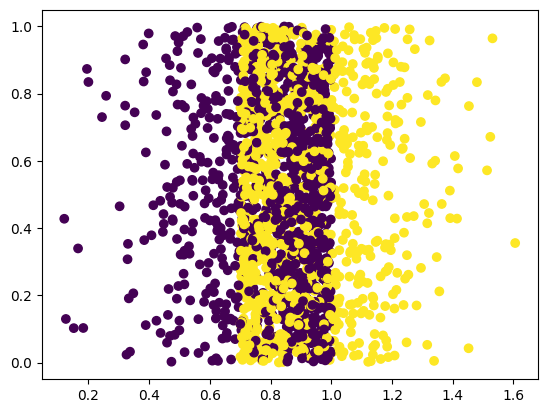

In [8]:
class_4_2 = class_4_1
class_4_2[:, 0] = class_4_2[:, 0] - 0.5
data_set_beta_sm_l = np.vstack([class_3_1, class_4_2])
np.random.shuffle(data_set_beta_sm_l)

fig_2_2, ax_2_2 = plt.subplots()
ax_2_2.scatter(data_set_beta_sm_l[:, 0], data_set_beta_sm_l[:, 1], c=data_set_beta_sm_l[:, 2].astype('float'))
plt.show()

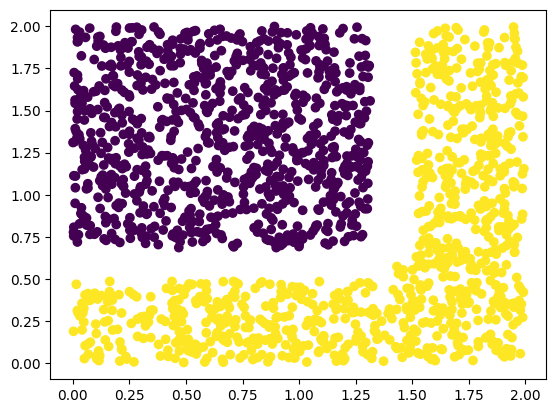

In [28]:
l = 2
mu_x = 1
mu_y = 1
class_5 = np.random.uniform([mu_x-l/2, mu_y-l/2], [mu_x+l/2, mu_y+l/2], (n_1+n_2, 2))
class_5_1 = class_5[class_5[:, 0]>l/np.sqrt(2),:]
class_5_2 = class_5[class_5[:, 0]<l/np.sqrt(2),:]
class_5_3 = class_5_2[class_5_2[:, 1] < l * (1- 1/np.sqrt(2)), :]
class_5_2 = class_5_2[class_5_2[:, 1] > l * (1- 1/np.sqrt(2)), :]
class_5_4 = class_5_1[class_5_1[:, 1] < l * (1- 1/np.sqrt(2)), :]
class_5_1 = class_5_1[class_5_1[:, 1] > l * (1- 1/np.sqrt(2)), :]

class_5_2_1 = class_5_2[class_5_2[:, 0] < l/np.sqrt(2) - l * 0.05]
class_5_2_1 = class_5_2_1[class_5_2_1[:, 1] > l * (1- 1/np.sqrt(2)) + l *0.05]
class_5_1_1 = class_5_1[class_5_1[:, 0] > l/np.sqrt(2) + l * 0.05]
class_5_3_1 = class_5_3[class_5_3[:, 1] < l * (1- 1/np.sqrt(2)) - l *0.05]


#class_5 = class_5_2[class_5_2[:, 1]>l*(1-1/np.sqrt(2))+0.1, :]
class_5 = class_5_2_1
class_6 = np.vstack([class_5_1_1, class_5_3_1, class_5_4])


labels_1_1=np.zeros((len(class_5), 1))
labels_2_1=np.ones((len(class_6), 1))

class_5_1 = np.hstack([class_5, labels_1_1])
class_6_1 = np.hstack([class_6, labels_2_1])

#class_6_1[:, 0] = class_6_1[:, 0] + 0.2
#class_6_1[:, 1] = class_6_1[:, 1] - 0.2

data_set_uf_hm_sq = np.vstack([class_5_1, class_6_1])

fig_3_1, ax_3_1 = plt.subplots()
ax_3_1.scatter(data_set_uf_hm_sq[:, 0], data_set_uf_hm_sq[:, 1], c=data_set_uf_hm_sq[:, 2].astype('float'))
plt.show()



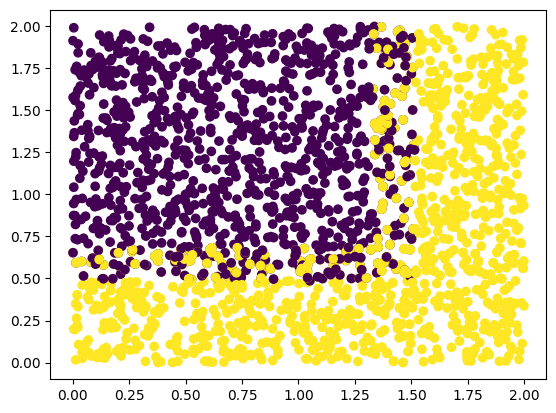

In [29]:
l = 2
mu_x = 1
mu_y = 1
class_5 = np.random.uniform([mu_x-l/2, mu_y-l/2], [mu_x+l/2, mu_y+l/2], (n_1+n_2, 2))
class_5_1 = class_5[class_5[:, 0]>l/np.sqrt(2) - l * 0.05,:]
class_5_2 = class_5[class_5[:, 0]<l/np.sqrt(2) + l * 0.05,:]
class_5_3 = class_5_2[class_5_2[:, 1] < l * (1- 1/np.sqrt(2)) + l * 0.05, :]
class_5_2 = class_5_2[class_5_2[:, 1] > l * (1- 1/np.sqrt(2)) - l * 0.05, :]
class_5_4 = class_5_1[class_5_1[:, 1] < l * (1- 1/np.sqrt(2)) + l * 0.05, :]
class_5_1 = class_5_1[class_5_1[:, 1] > l * (1- 1/np.sqrt(2)) - l * 0.05, :]

#class_5_2_1 = class_5_2[class_5_2[:, 0] < l/np.sqrt(2) - l * 0.05]
#class_5_2_1 = class_5_2_1[class_5_2_1[:, 1] > l * (1- 1/np.sqrt(2)) + l *0.05]
#class_5_1_1 = class_5_1[class_5_1[:, 0] > l/np.sqrt(2) + l * 0.05]
#class_5_3_1 = class_5_3[class_5_3[:, 1] < l * (1- 1/np.sqrt(2)) - l *0.05]

#class_5 = class_5_2[class_5_2[:, 1]>l*(1-1/np.sqrt(2))+0.1, :]
class_7 = class_5_2
class_8 = np.vstack([class_5_1, class_5_3, class_5_4])


labels_1_1=np.zeros((len(class_7), 1))
labels_2_1=np.ones((len(class_8), 1))

class_7 = np.hstack([class_7, labels_1_1])
class_8 = np.hstack([class_8, labels_2_1])

data_set_uf_sm_sq = np.vstack([class_7, class_8])
np.random.shuffle(data_set_uf_sm_sq)

fig_3_2, ax_3_2 = plt.subplots()
ax_3_2.scatter(data_set_uf_sm_sq[:, 0], data_set_uf_sm_sq[:, 1], c=data_set_uf_sm_sq[:, 2].astype('float'))
plt.show()


In [49]:
from scipy.stats import dirichlet
var_1 = dirichlet([2,2,5])
var_2 = dirichlet([2,2,5])
var_3 = dirichlet([2,2,5])
var_4 = dirichlet([2,2,5])
set_1 = var_1.rvs(500)
set_2 = var_2.rvs(500)
set_3 = var_3.rvs(500)
set_4 = var_4.rvs(500)

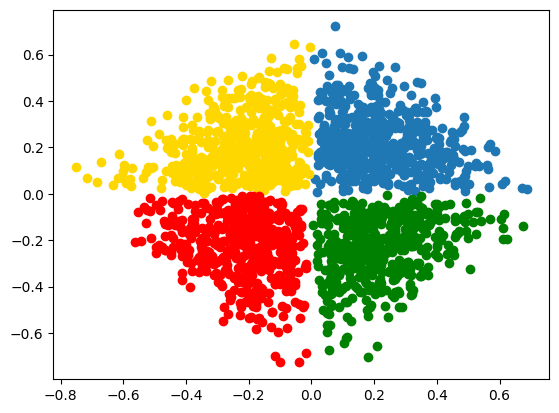

In [50]:
#theta = np.pi / 4
#rot_mat = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
#set_11 = set_1[:, 0:2]

#set_1_1 = np.matmul(set_11, rot_mat)

set_2[:, 0] = set_2[:, 0] * -1
set_3 = set_3 * -1
set_4[:, 1] = set_4[:, 1] *-1



fig_4, ax_4 = plt.subplots()
ax_4.scatter(set_1[:, 0], set_1[:, 1])
ax_4.scatter(set_2[:, 0], set_2[:, 1], c='gold')
ax_4.scatter(set_3[:, 0], set_3[:, 1], c ='red')
ax_4.scatter(set_4[:, 0], set_4[:, 1], c='green')
plt.show()


4951


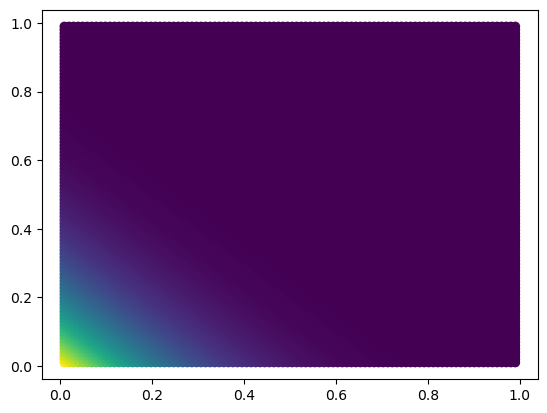

In [133]:
x = np.linspace(0.01, 0.99, 100, endpoint=True)
y = np.linspace(0.01, 0.99, 100, endpoint=True)
xg, yg = np.meshgrid(x, y)
x_flat = xg.reshape(-1, 1)
y_flat = yg.reshape(-1, 1)
xy = np.hstack((x_flat, y_flat))

z = np.zeros((len(xy)))
for i in range(0, len(xy)):
    print(i)
    z[i] = var.pdf(xy[i, :])

fig_4, ax_4 = plt.subplots()
ax_4.scatter(x_flat, y_flat, c=z.astype(float))
plt.show()


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


ValueError: Each entry in 'x' must be greater than or equal to zero.